In [26]:
import requests

In [27]:
def get_article_wikipedia(page : str):
    url = f'https://ru.wikipedia.org/w/api.php?action=parse&page={page}&format=json'
    response = requests.get(url)
    data = response.json()
    return data

query = 'Пермь'

wikipedia_article = get_article_wikipedia(query)
wikipedia_article

{'parse': {'title': 'Пермь',
  'pageid': 1105,
  'revid': 140388963,
  'text': {'*': '<div class="mw-content-ltr mw-parser-output" lang="ru" dir="ltr"><div class="hatnote navigation-not-searchable noprint dabhide">У этого термина существуют и другие значения, см. <a href="/wiki/%D0%9F%D0%B5%D1%80%D0%BC%D1%8C_(%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D1%8F)" class="mw-disambig" title="Пермь (значения)">Пермь (значения)</a>.</div>\n<div class="hatnote navigation-not-searchable dabhide">Иное название города (в 1940—1957 годах)&#160;— «Молотов»; см. также <a href="/wiki/%D0%9C%D0%BE%D0%BB%D0%BE%D1%82%D0%BE%D0%B2_(%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D1%8F)" class="mw-disambig" title="Молотов (значения)">другие значения</a>.</div>\n<table class="infobox infobox-f1d04a7e5d2510e2" style="" data-name="НП+Россия"><tbody><tr><td colspan="2" class="" style="text-align:center;">Город</td></tr><tr><th colspan="2" scope="colgroup" class="infobox-above" style="">Пермь</th></tr><tr><td colspan

In [28]:
from urllib.parse import quote_plus, unquote_plus

def get_article_mediawiki(page:str):
    url = f'https://www.mediawiki.org/w/api.php?action=parse&page={page}&format=json'
    response = requests.get(url)
    data = response.json()
    return data

mediawiki_article = get_article_mediawiki('Lazy loading of references on Russian Wikipedia')
mediawiki_article

{'parse': {'title': 'Lazy loading of references on Russian Wikipedia',
  'pageid': 616930,
  'revid': 5596834,
  'text': {'*': '<div class="mw-content-ltr mw-parser-output" lang="en" dir="ltr"><p>On the 1st September, lazy loading references was disabled on Russian Wikipedia after <a href="/wiki/Reading/Web/Lazy_loading_of_images_and_references_on_Russian_Wikipedia" title="Reading/Web/Lazy loading of images and references on Russian Wikipedia">both images and references were enabled back in July</a>. The beneficial <a href="/wiki/Reading/Web/Lazy_loading_of_images_on_all_wikis" title="Reading/Web/Lazy loading of images on all wikis">Lazy loading of images</a> continued to be enabled. Whereas previously all references views were routed via the API, now references would be served in the HTML.\n</p><p>The impact gives the impression that very few users need references in a page view. In a week period, after ending the experiment, an additional 338GB were shipped to Russian Wikipedia and t

In [29]:
# def get_article_wikimedia(page:str):
#     url = f'https://www.commons.wikimedia.org/w/api.php?action=parse&page={page}&format=json'
#     response = requests.get(url)
#     data = response.json()
#     return data

# wikimedia_article = get_article_wikimedia('Пермь')
# wikipedia_article

In [30]:
import bs4

def parse_html(article) -> bs4.BeautifulSoup:
    html = article['parse']['text']['*']
    return bs4.BeautifulSoup(html, 'html.parser')
soup = parse_html(wikipedia_article)
soup

<div class="mw-content-ltr mw-parser-output" dir="ltr" lang="ru"><div class="hatnote navigation-not-searchable noprint dabhide">У этого термина существуют и другие значения, см. <a class="mw-disambig" href="/wiki/%D0%9F%D0%B5%D1%80%D0%BC%D1%8C_(%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D1%8F)" title="Пермь (значения)">Пермь (значения)</a>.</div>
<div class="hatnote navigation-not-searchable dabhide">Иное название города (в 1940—1957 годах) — «Молотов»; см. также <a class="mw-disambig" href="/wiki/%D0%9C%D0%BE%D0%BB%D0%BE%D1%82%D0%BE%D0%B2_(%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D1%8F)" title="Молотов (значения)">другие значения</a>.</div>
<table class="infobox infobox-f1d04a7e5d2510e2" data-name="НП+Россия" style=""><tbody><tr><td class="" colspan="2" style="text-align:center;">Город</td></tr><tr><th class="infobox-above" colspan="2" scope="colgroup" style="">Пермь</th></tr><tr><td class="infobox-image" colspan="2" style=""> <span class="wikidata-claim" data-wikidata-claim-id="Q91

In [31]:
def find_links(soup: bs4.BeautifulSoup) -> list:
    div = soup.find('div', class_='mw-parser-output')
    enclosing_p = div.find('p', recursive=False)
    declosing_p = enclosing_p.find_next_sibling('p')

    a_tags = enclosing_p.find_all('a')
    if declosing_p:
        a_tags += declosing_p.find_all('a')
    links = []
    for a in a_tags:
        href = a.get('href')
        if href.startswith('/wiki/') and not href.startswith(f'/wiki/{quote_plus('Файл')}:'):
            links.append({
                'title' : a.get('title') if a.get('title') else a.text,
                'href' : href
            })
    return links

links = find_links(soup)
links

[{'title': 'Международный фонетический алфавит',
  'href': '/wiki/%D0%9C%D0%B5%D0%B6%D0%B4%D1%83%D0%BD%D0%B0%D1%80%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9_%D1%84%D0%BE%D0%BD%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BB%D1%84%D0%B0%D0%B2%D0%B8%D1%82'},
 {'title': 'Город', 'href': '/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4'},
 {'title': 'Европейская часть России',
  'href': '/wiki/%D0%95%D0%B2%D1%80%D0%BE%D0%BF%D0%B5%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D1%87%D0%B0%D1%81%D1%82%D1%8C_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'},
 {'title': 'Россия', 'href': '/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F'},
 {'title': 'Предуралье',
  'href': '/wiki/%D0%9F%D1%80%D0%B5%D0%B4%D1%83%D1%80%D0%B0%D0%BB%D1%8C%D0%B5'},
 {'title': 'Кама', 'href': '/wiki/%D0%9A%D0%B0%D0%BC%D0%B0'},
 {'title': 'Чусовая',
  'href': '/wiki/%D0%A7%D1%83%D1%81%D0%BE%D0%B2%D0%B0%D1%8F'},
 {'title': 'Административный центр',
  'href': '/wiki/%D0%90%D0%B4%D0%BC%D0%B8%D0%BD%D0%B8%D1%81%D1%82%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D1%8B

In [2]:
import anytree

def make_tree()

In [32]:
# def article_list_to_dict(article_list :list) -> dict:
#     result = {}
#     for article in article_list:
#         print(article['title'])
#         children = get_article_wikipedia(article['title'])
#         if 'parse' in wikipedia_article:
#             if 'text' in children['parse']:
#                 children_soup = parse_html(children)
#                 children_links = find_links(children_soup)
#                 result[article['title']] = children_links
#                 for children_link in children_links:
#                     print(f'\t{children_link['title']}')
#     return result

# graph = article_list_to_dict(links)
# graph



Международный фонетический алфавит
	Английский язык
	Французский язык
	Фонетическая транскрипция
	Международная фонетическая ассоциация
	Лингвист
	Логопедия
	Певец
	Актёр
	Лексикография
	Перевод
	Устная речь
	Фонема
	Интонация (лингвистика)
	Слово
	Слог
	Расщепление нёба
Город
	Населённый пункт
	Статус города
	Земляной вал
	Городские стены
	Киевская Русь
	Населённый пункт
	Искусство
	Ремесло
Европейская часть России
	Территория
	Россия
	Европа
	Славяне
	Финно-угорские народы
	Балты
	Германоязычные народы
	Тюрки
	Народы Кавказа
Россия
	Государство
	Восточная Европа
	Северная Азия
	Список государств и зависимых территорий по площади
	Население России
	Передача Крымской области из состава РСФСР в состав УССР
	Крым
	Захват Крыма Россией
	Аннексия Крыма Российской Федерацией
	Санкции против России (2014)
	Список стран по населению
	Москва
	Официальный язык
	Русский язык
	Государственные и официальные языки в субъектах Российской Федерации
	Российский рубль
Предуралье
	Урал
	Кама
	Печора (ре

{'Международный фонетический алфавит': [{'title': 'Английский язык',
   'href': '/wiki/%D0%90%D0%BD%D0%B3%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%8F%D0%B7%D1%8B%D0%BA'},
  {'title': 'Французский язык',
   'href': '/wiki/%D0%A4%D1%80%D0%B0%D0%BD%D1%86%D1%83%D0%B7%D1%81%D0%BA%D0%B8%D0%B9_%D1%8F%D0%B7%D1%8B%D0%BA'},
  {'title': 'Фонетическая транскрипция',
   'href': '/wiki/%D0%A4%D0%BE%D0%BD%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%82%D1%80%D0%B0%D0%BD%D1%81%D0%BA%D1%80%D0%B8%D0%BF%D1%86%D0%B8%D1%8F'},
  {'title': 'Международная фонетическая ассоциация',
   'href': '/wiki/%D0%9C%D0%B5%D0%B6%D0%B4%D1%83%D0%BD%D0%B0%D1%80%D0%BE%D0%B4%D0%BD%D0%B0%D1%8F_%D1%84%D0%BE%D0%BD%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%B0%D1%81%D1%81%D0%BE%D1%86%D0%B8%D0%B0%D1%86%D0%B8%D1%8F'},
  {'title': 'Лингвист',
   'href': '/wiki/%D0%9B%D0%B8%D0%BD%D0%B3%D0%B2%D0%B8%D1%81%D1%82'},
  {'title': 'Логопедия',
   'href': '/wiki/%D0%9B%D0%BE%D0%B3%D0%BE%D0%BF%D0%B5%D0%B4%D0%B

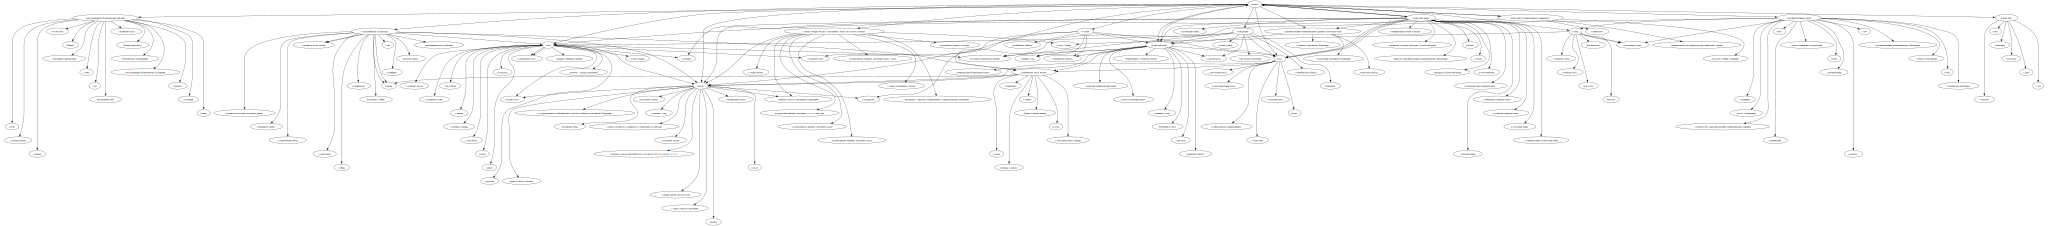

In [34]:
# import graphviz


# def make_graph(query:str, graph_dict:dict):
#     dot = graphviz.Digraph()

#     dot.node(query)

#     for parent, children in graph.items():
#         dot.node(parent)
#         dot.edge(query, parent)
#         for child in children:
#             dot.node(child['title'])
#             dot.edge(parent, child['title'])

#     dot.unflatten(stagger=10)